#Downloading Dataset

1. Create a directory Named kaggle
2. Copy file "kaggle.json" to the Kaggle directory

> You must obtain this kaggle key to download the dataset.

In [7]:
!mkdir -p ./kaggle

In [8]:
!cp kaggle.json ~/.kaggle/

In [9]:
#download dataset
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 224MB/s]
100% 1.06G/1.06G [00:04<00:00, 244MB/s]


In [10]:
#unzip the dataset
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

#Importing Important Packages

In [11]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc




#Data Analysis

In [12]:
#create a function to plot images present in directory

def plot_images(path, animal, num=9):
  image_filenames = os.listdir(path) #retrieve list of name of all files in directory

  if len(image_filenames) < num: #just in case
    print(f"Only {len(image_filenames)} images present in Directory.")
    num = len(image_filenames)

  #randomly selecting "num" names in the list image_filenames
  random_images = random.sample(image_filenames, num)

  #plotting the selected images
  fig, axes = plt.subplots(3,3, figsize=(8,8)) #this will plot 9 images in 3x3 format
  axes = axes.ravel() #https://stackoverflow.com/questions/50455551/why-is-numpy-ravel-required-in-this-code-that-produces-small-multiples

  for i, img_file in enumerate(random_images):
    img_path = os.path.join(path, img_file)
    image = Image.open(img_path)
    axes[i].imshow(image)
    axes[i].set_title(f"{animal}")
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

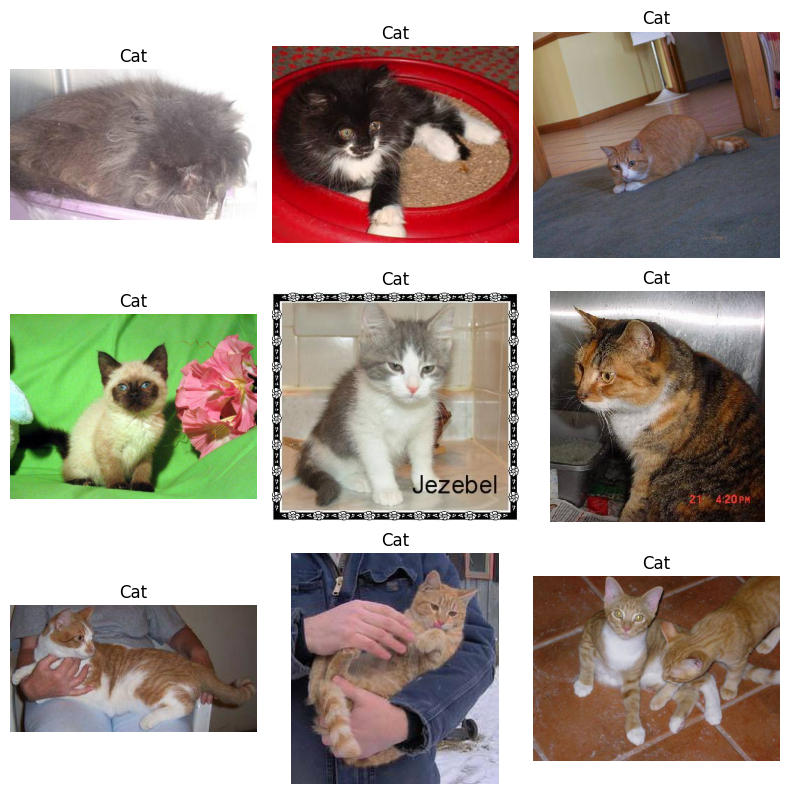

In [13]:
cat_path = '/content/dogs_vs_cats/train/cats'
plot_images(path=cat_path, animal='Cat')

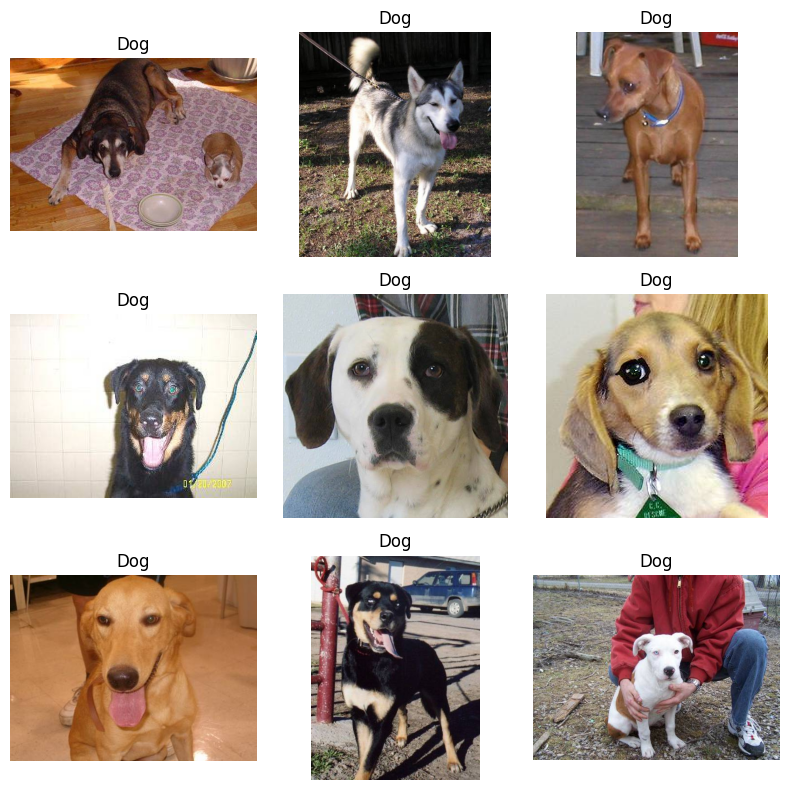

In [14]:
dog_path = '/content/dogs_vs_cats/train/dogs'
plot_images(dog_path, animal="Dog")

In [15]:
num_cat_img = os.listdir(cat_path)
num_dog_img = os.listdir(dog_path)

print("Cat",len(num_cat_img))
print("Dog",len(num_dog_img))

Cat 10000
Dog 10000


#Removing corrupt Files if any

Sometimes our data may not be as clean as we think

In [16]:
import cv2
import imghdr

In [17]:
acceptable_image = ['jpeg', 'jpg', 'png']
data_dir = '/content/dogs_vs_cats'

for root, dirs, files in os.walk(data_dir): #walk will visit all directory and subdirectory
  for file in files:
    file_path = os.path.join(root, file)

    try:
        file_type = imghdr.what(file_path)

        if file_type not in acceptable_image:
          print(f"this is not acceptable {file_path}")
          os.remove(file_path)
        else:
          img = cv2.imread(file_path)
    except:
        print(f"Issue with file {file_path}")
        os.remove(file_path)


In [18]:
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      image_array = np.array(img)
      return image_array
  except:
      return None

In [19]:
print(image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg'))

[[[  9   8   4]
  [ 10  11   6]
  [ 13  13  11]
  ...
  [160 162 183]
  [159 161 184]
  [158 160 183]]

 [[ 17  13  10]
  [ 16  15  11]
  [ 17  17  15]
  ...
  [157 159 180]
  [156 158 181]
  [155 157 180]]

 [[ 17  12   8]
  [ 17  13  10]
  [ 17  16  14]
  ...
  [155 157 178]
  [154 156 179]
  [153 155 178]]

 ...

 [[110  95  88]
  [111  96  89]
  [112  97  90]
  ...
  [128 111 101]
  [128 112  99]
  [128 112  99]]

 [[110  95  88]
  [109  94  87]
  [110  95  88]
  ...
  [129 112 102]
  [129 113 100]
  [129 113 100]]

 [[113  98  91]
  [110  95  88]
  [109  94  87]
  ...
  [125 108  98]
  [125 109  96]
  [125 109  96]]]


#Image Generator and Batches

In [20]:
base_dir = '/content/dogs_vs_cats/train'

Using ImageDataGenerator to load training and Validation data without much hassle, also resize to 150*150

In [21]:
generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [22]:
train_generator = generator.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

val_generator = generator.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [23]:
train_class = train_generator.class_indices
print(train_class)

validation_class = val_generator.class_indices
print(validation_class)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


#Simple CNN model

In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

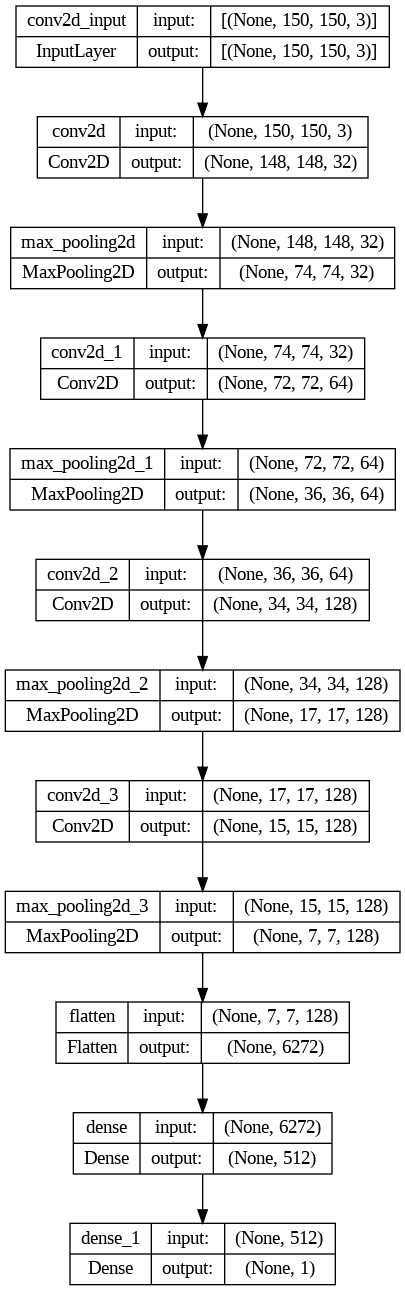

In [25]:
plot_model(model, to_file = 'Model.png',
           show_shapes=True, show_layer_names=True)

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(val_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [28]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=200)

Epoch 1/10
800/800 [==============================] - 42s 44ms/step - loss: 0.6428 - accuracy: 0.6122 - val_loss: 0.5873 - val_accuracy: 0.7065
Epoch 2/10
800/800 [==============================] - 35s 43ms/step - loss: 0.5173 - accuracy: 0.7415 - val_loss: 0.5806 - val_accuracy: 0.7140
Epoch 3/10
800/800 [==============================] - 38s 48ms/step - loss: 0.4147 - accuracy: 0.8080 - val_loss: 0.3922 - val_accuracy: 0.8250
Epoch 4/10
800/800 [==============================] - 34s 43ms/step - loss: 0.3378 - accuracy: 0.8495 - val_loss: 0.3693 - val_accuracy: 0.8428
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.2766 - accuracy: 0.8791 - val_loss: 0.3539 - val_accuracy: 0.8562
Epoch 6/10
800/800 [==============================] - 35s 43ms/step - loss: 0.2170 - accuracy: 0.9094 - val_loss: 0.3465 - val_accuracy: 0.8602
Epoch 7/10
800/800 [==============================] - 34s 43ms/step - loss: 0.1582 - accuracy: 0.9363 - val_loss: 0.3625 - val_accuracy:

#Plotting Accuracy and Loss

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

range_ = range(len(accuracy))

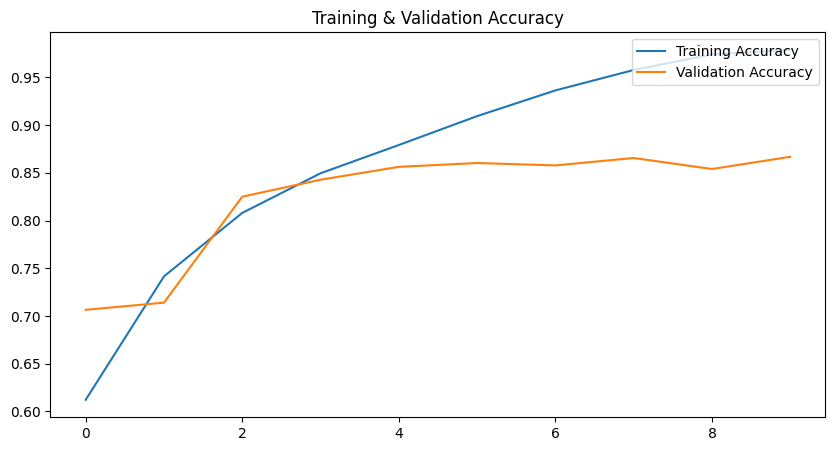

In [33]:
plt.figure(figsize=(10,5))
plt.plot(range_, accuracy, label="Training Accuracy")
plt.plot(range_, val_accuracy, label="Validation Accuracy")
plt.legend(loc='upper right')
plt.title('Training & Validation Accuracy')
plt.show()

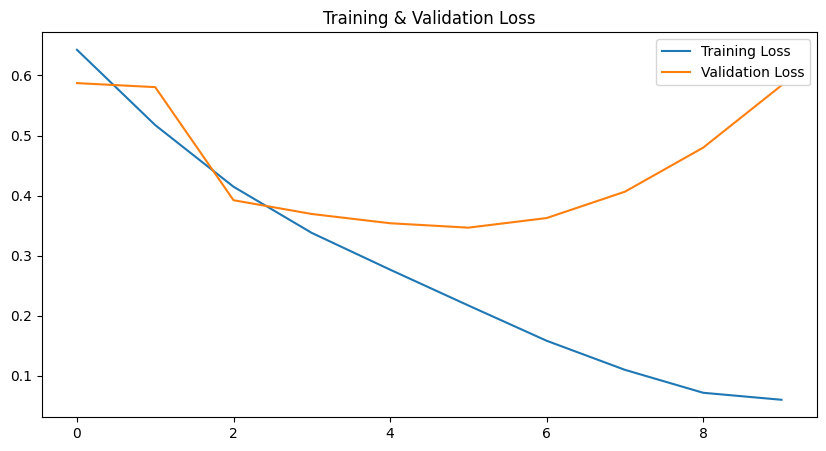

In [35]:
plt.figure(figsize=(10,5))
plt.plot(range_, loss, label="Training Loss")
plt.plot(range_, val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

#Model Evalutation

In [37]:
test_dir = '/content/dogs_vs_cats/test'

test_gene = ImageDataGenerator(rescale=1./255)

test_generator = test_gene.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [38]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [42]:
test_class = test_generator.classes

test_res = model.predict(test_generator, steps = 250.0)

predcited_class = (test_res>0.5).astype(int).squeeze()

class_labels = list(test_generator.class_indices.keys())

250/250 [==============================] - 10s 38ms/step


In [43]:
predcited_class

array([0, 0, 0, ..., 1, 1, 1])

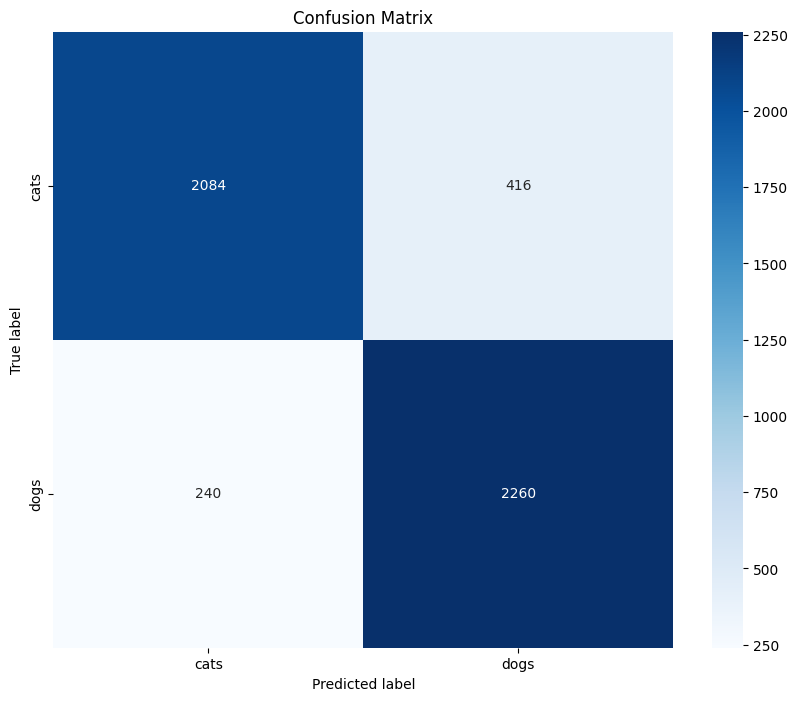

In [45]:
confusion_mat = confusion_matrix(test_class, predcited_class)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 10s 40ms/step - loss: 0.5990 - accuracy: 0.8688
Test accuracy: 86.88%
Test loss: 0.60


Not A very Good Model, but it is only a tutorial